          a         b         c         d         e
0  0.435447  0.751492  0.919112  0.485555  0.214092
1  0.399780  0.421688  0.486705  0.988165  0.759532
2  0.786568  0.992546  0.941457  0.131853  0.184234
3  0.423965  0.565356  0.097326  0.765130  0.714268
4  0.955072  0.584286  0.358737  0.829988  0.772823


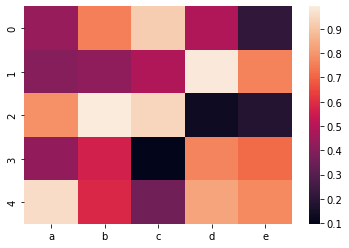

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
print(df)
# Default heatmap
p1 = sns.heatmap(df)

In [1]:
from html2image import Html2Image
hti = Html2Image()

ModuleNotFoundError: No module named 'html2image'

In [2]:
import dearpygui.dearpygui as dpg

dpg.create_context()
dpg.create_viewport()
dpg.setup_dearpygui()

def sort_callback(sender, sort_specs):

    # sort_specs scenarios:
    #   1. no sorting -> sort_specs == None
    #   2. single sorting -> sort_specs == [[column_id, direction]]
    #   3. multi sorting -> sort_specs == [[column_id, direction], [column_id, direction], ...]
    #
    # notes:
    #   1. direction is ascending if == 1
    #   2. direction is ascending if == -1

    # no sorting case
    if sort_specs is None: return

    rows = dpg.get_item_children(sender, 1)

    # create a list that can be sorted based on first cell
    # value, keeping track of row and value used to sort
    sortable_list = []
    for row in rows:
        first_cell = dpg.get_item_children(row, 1)[0]
        sortable_list.append([row, dpg.get_value(first_cell)])

    def _sorter(e):
        return e[1]

    sortable_list.sort(key=_sorter, reverse=sort_specs[0][1] < 0)

    # create list of just sorted row ids
    new_order = []
    for pair in sortable_list:
        new_order.append(pair[0])

    dpg.reorder_items(sender, 1, new_order)

with dpg.window(label="Tutorial", width=500):

    with dpg.table(header_row=True, borders_innerH=True, borders_outerH=True,
                   borders_innerV=True, borders_outerV=True, row_background=True,
                   sortable=True, callback=sort_callback):

        dpg.add_table_column(label="One")
        dpg.add_table_column(label="Two", no_sort=True)

        for i in range(25):
            with dpg.table_row():
                dpg.add_input_int(label=" ", step=0, default_value=i)
                dpg.add_text(f"Cell {i}, 1")

# main loop
dpg.show_viewport()
dpg.start_dearpygui()
dpg.destroy_context()